# Start and Load

In [611]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from catboost import CatBoostRegressor
from sklearn.impute import KNNImputer

from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import RandomizedSearchCV, KFold

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [612]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
combined_data = pd.concat([train[train.columns], test], ignore_index=True)
print(f'train data shape -- {train.shape}')
print(f'test data shape -- {test.shape}')
print(f'combined_data shape -- {combined_data.shape}')

train data shape -- (1460, 81)
test data shape -- (1459, 80)
combined_data shape -- (2919, 81)


# EDA

In [613]:
combined_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [614]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [615]:
missing = combined_data.drop('SalePrice', axis=1).isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing

TotalBsmtSF        1
GarageArea         1
GarageCars         1
KitchenQual        1
Electrical         1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
SaleType           1
Exterior1st        1
Exterior2nd        1
Functional         2
Utilities          2
BsmtHalfBath       2
BsmtFullBath       2
MSZoning           4
MasVnrArea        23
BsmtFinType1      79
BsmtFinType2      80
BsmtQual          81
BsmtCond          82
BsmtExposure      82
GarageType       157
GarageCond       159
GarageQual       159
GarageYrBlt      159
GarageFinish     159
LotFrontage      486
FireplaceQu     1420
MasVnrType      1766
Fence           2348
Alley           2721
MiscFeature     2814
PoolQC          2909
dtype: int64

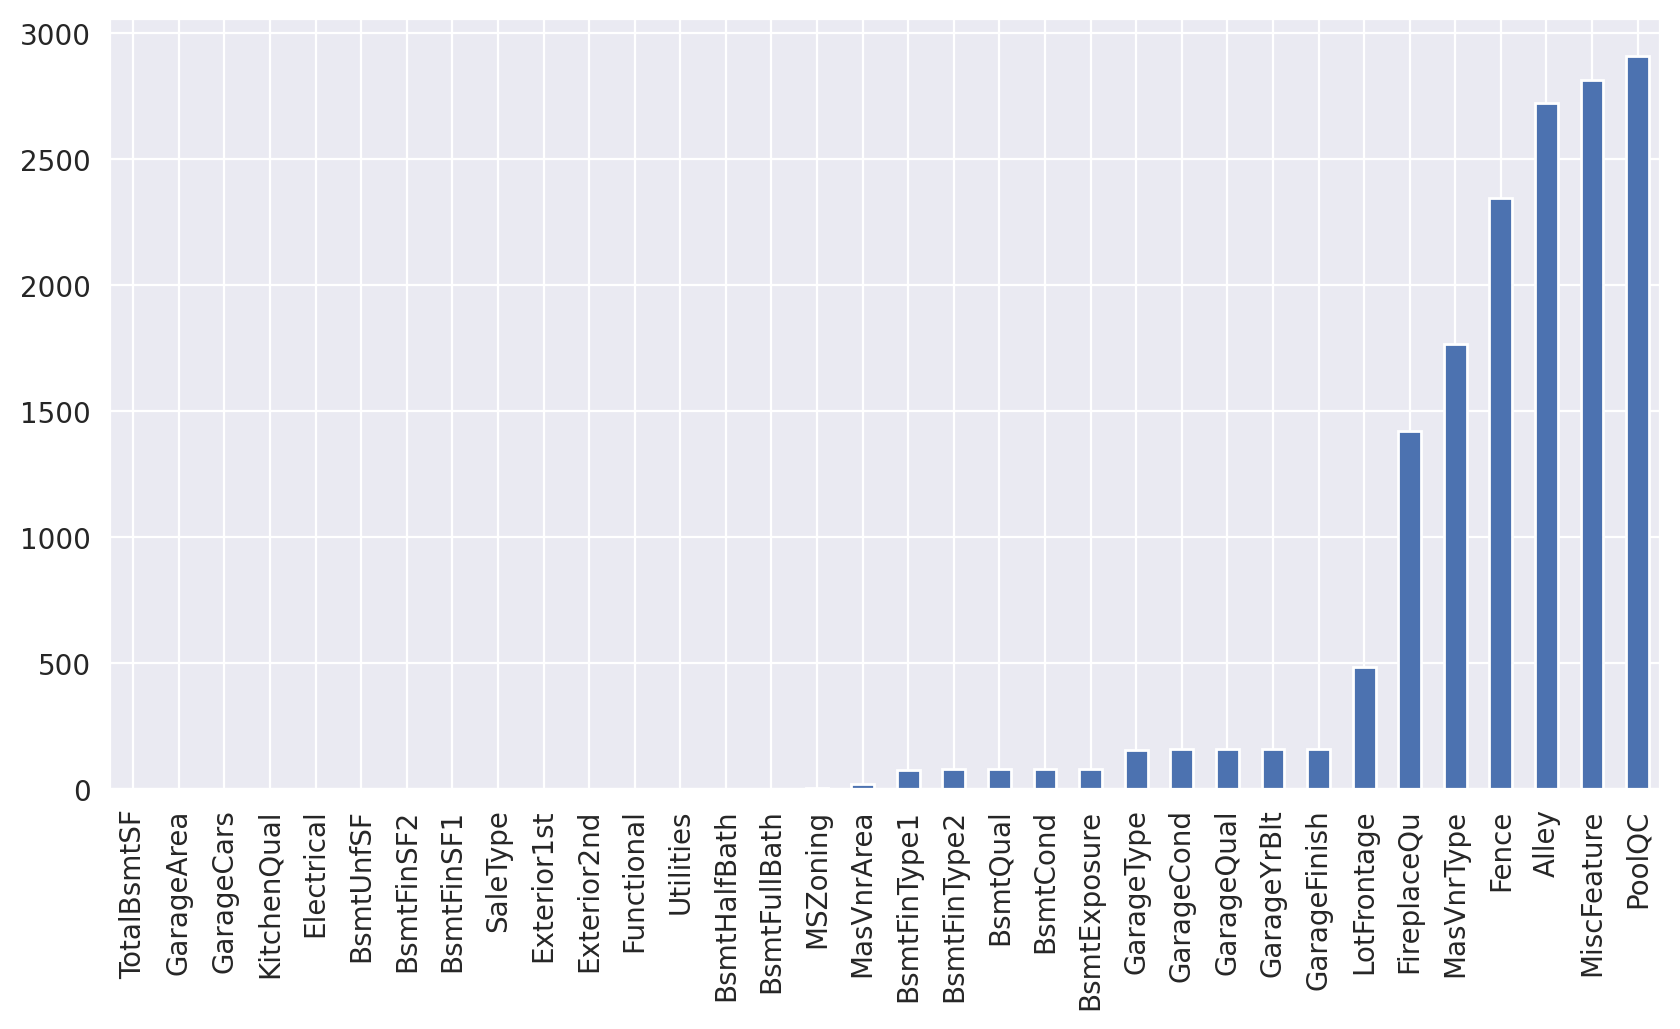

In [616]:
plt.figure(figsize=(10, 5), dpi=200)
missing.plot.bar();

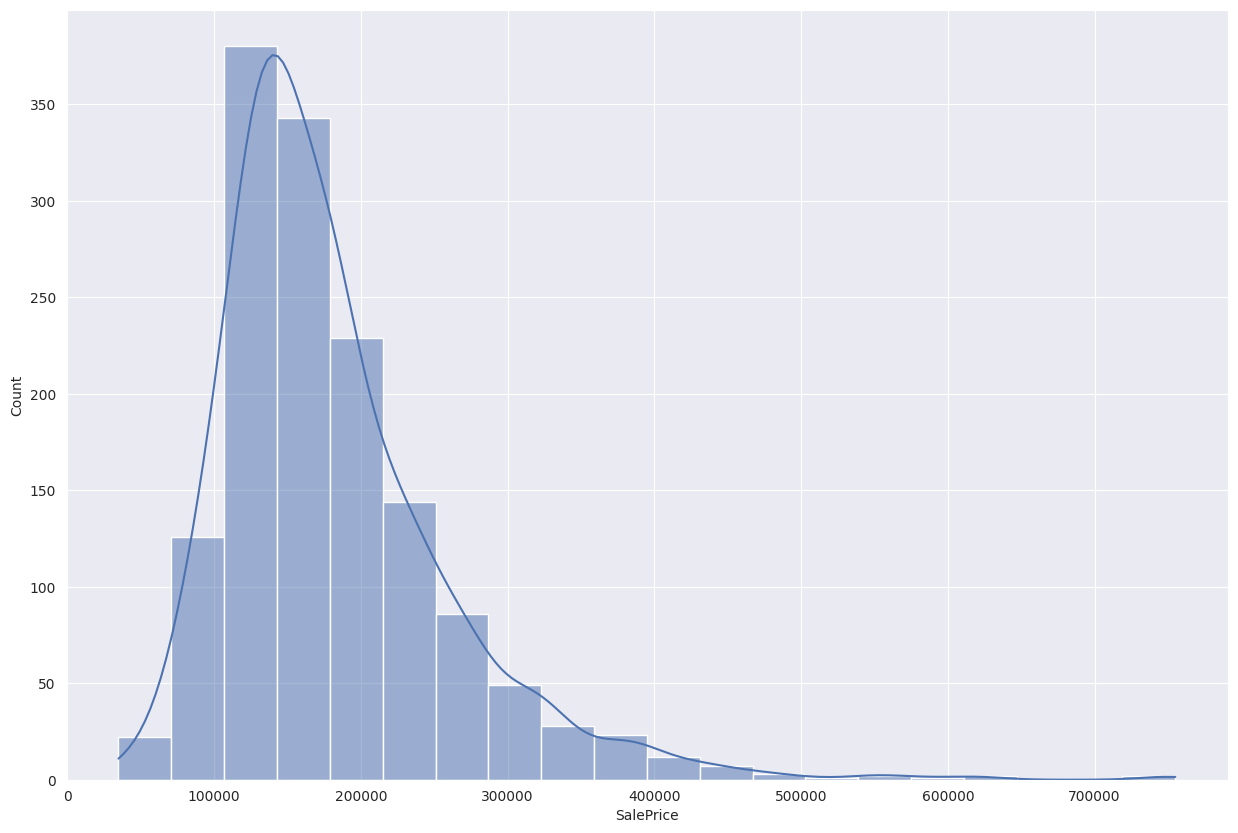

In [617]:
sns.set({'figure.figsize': (15, 10)})
sns.histplot(train['SalePrice'], kde=True, bins=20);

# Filling Missing Values

**MSZoning**

In [618]:
missing_values = combined_data[combined_data['MSZoning'].isnull()]

for index, row in missing_values.iterrows():
    neighborhood = row['Neighborhood']
    rplace = combined_data[combined_data['Neighborhood'] == neighborhood]['MSZoning'].mode().values[0]
    combined_data.at[index, 'MSZoning'] = rplace
    print(f'Filled "MSZoning" in neighborhood {neighborhood} with value: {rplace}')

Filled "MSZoning" in neighborhood IDOTRR with value: RM
Filled "MSZoning" in neighborhood IDOTRR with value: RM
Filled "MSZoning" in neighborhood IDOTRR with value: RM
Filled "MSZoning" in neighborhood Mitchel with value: RL


**MasVnrArea and MasVnrType**

In [619]:
combined_data.loc[combined_data['MasVnrType'] == 'None', 'MasVnrArea'] = 0
combined_data.loc[combined_data['MasVnrArea'] == 0, "MasVnrType"] = 'None'

**Moda filling**

In [620]:
cols_moda = ['Utilities', 'Exterior1st', 'Exterior2nd',
             'MasVnrType', 'Electrical', 'KitchenQual',
             'Functional', 'SaleType']

for col in cols_moda:
    combined_data[col] = combined_data[col].fillna(combined_data[col].mode()[0])

**Anomalie: Garage**

In [621]:
cat_grg_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
num_grg_cols = ['GarageCars', 'GarageArea']

for col in cat_grg_cols:
    combined_data.loc[combined_data[col].isnull(), cat_grg_cols] = np.nan

for col in num_grg_cols:
    combined_data.loc[combined_data[col] == 0, num_grg_cols] = 0
    
combined_data.loc[combined_data['GarageType'].isna(), num_grg_cols] = 0
combined_data.loc[combined_data['GarageArea'] == 0, cat_grg_cols] = np.nan

**Anomalie: Basement**

In [622]:
cat_bsmt_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
num_bsmt_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']

for col in cat_grg_cols:
    combined_data.loc[combined_data[col].isnull(), cat_bsmt_cols] = np.nan

for col in num_bsmt_cols:
    combined_data.loc[combined_data[col] == 0, num_bsmt_cols] = 0

combined_data.loc[combined_data['BsmtCond'].isnull(), num_bsmt_cols] = 0

**Anomalie: Pool**

In [623]:
combined_data.loc[combined_data['PoolQC'].isnull(), 'PoolArea'] = 0
combined_data.loc[combined_data['PoolArea'] == 0, 'PoolQC'] = np.nan

**Check**

In [624]:
missing

TotalBsmtSF        1
GarageArea         1
GarageCars         1
KitchenQual        1
Electrical         1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
SaleType           1
Exterior1st        1
Exterior2nd        1
Functional         2
Utilities          2
BsmtHalfBath       2
BsmtFullBath       2
MSZoning           4
MasVnrArea        23
BsmtFinType1      79
BsmtFinType2      80
BsmtQual          81
BsmtCond          82
BsmtExposure      82
GarageType       157
GarageCond       159
GarageQual       159
GarageYrBlt      159
GarageFinish     159
LotFrontage      486
FireplaceQu     1420
MasVnrType      1766
Fence           2348
Alley           2721
MiscFeature     2814
PoolQC          2909
dtype: int64

In [625]:
missing_new = combined_data.drop('SalePrice', axis=1).isnull().sum()
missing_new = missing_new[missing_new > 0]
missing_new.sort_values(inplace=True)
missing_new

MasVnrArea        23
GarageCond       159
GarageQual       159
GarageType       159
GarageYrBlt      159
GarageFinish     159
BsmtFinType1     224
BsmtFinType2     225
BsmtQual         226
BsmtCond         227
BsmtExposure     227
LotFrontage      486
FireplaceQu     1420
Fence           2348
Alley           2721
MiscFeature     2814
PoolQC          2909
dtype: int64

In [626]:
missing_new = combined_data.drop('SalePrice', axis=1).isnull().sum()
missing_new = missing_new[missing_new > 0]
missing_new.sort_values(inplace=True)
missing_new

MasVnrArea        23
GarageCond       159
GarageQual       159
GarageType       159
GarageYrBlt      159
GarageFinish     159
BsmtFinType1     224
BsmtFinType2     225
BsmtQual         226
BsmtCond         227
BsmtExposure     227
LotFrontage      486
FireplaceQu     1420
Fence           2348
Alley           2721
MiscFeature     2814
PoolQC          2909
dtype: int64

In [627]:
cat_cols = combined_data.select_dtypes(object).columns

for col in cat_cols:
    if combined_data[col].isnull().any():
        combined_data[col] = combined_data[col].fillna('Missing')

# Numeric features

In [628]:
numeric_features = train.select_dtypes(include=[int, float])
numeric_features.drop(['Id', 'MSSubClass'], axis=1, inplace=True)
numeric_columns = numeric_features.columns

In [629]:
correlation = np.abs(numeric_features.corr())
correlation['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePrice, dtype: float64

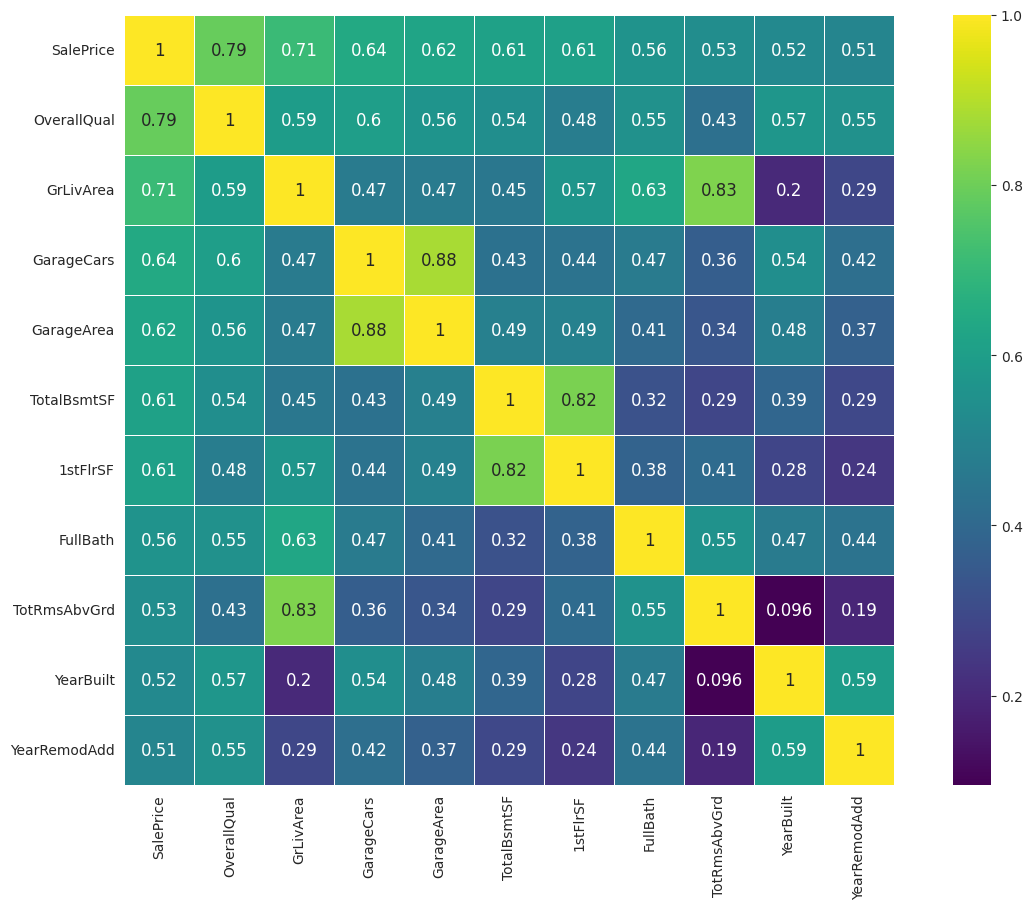

In [630]:
k = 11
cols = correlation.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.heatmap(data=cm, linewidths=0.5, square=True, annot=True, annot_kws={'size':12},
            xticklabels=cols.values, yticklabels=cols.values, cmap='viridis');

# Feature engineering

In [631]:
garage_age = combined_data["YrSold"] - combined_data["GarageYrBlt"]
combined_data["garageAgeRank"] = np.max(garage_age) - garage_age + 1
combined_data["garageAgeRank"] = combined_data["garageAgeRank"].fillna(0)

house_age = combined_data["YrSold"] - combined_data["YearBuilt"]
combined_data["houseAgeRank"] = np.max(house_age) - house_age + 1

house_remod = combined_data["YrSold"] - combined_data["YearRemodAdd"]
combined_data["houseRemodRank"] = np.max(house_remod) - house_remod + 1

combined_data['TotalFlrSF'] = combined_data['1stFlrSF'] + combined_data['2ndFlrSF']
combined_data['TotalArea'] = combined_data['GrLivArea'] + combined_data['TotalBsmtSF']
combined_data['NumBaths'] = combined_data['BsmtFullBath']+combined_data['FullBath']+ 0.5 * combined_data['BsmtHalfBath']+ 0.5 * combined_data['HalfBath']


combined_data['Total_porch_sf'] = (combined_data['OpenPorchSF'] + combined_data['3SsnPorch'] +
                                   combined_data['EnclosedPorch'] + combined_data['ScreenPorch'] +
                                   combined_data['WoodDeckSF'])

combined_data['Total_sqr_footage'] = combined_data['1stFlrSF'] + combined_data['2ndFlrSF'] + combined_data['BsmtFinSF1'] + combined_data['BsmtFinSF2']

# Definition of Groups

In [632]:
cols_to_knn = ['LotFrontage', 'MasVnrArea']

cols_to_drop = ['Utilities', 'MiscFeature', 'Condition2',
                'YrSold', 'GarageYrBlt', 'YearBuilt',
                'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 
                'GrLivArea', 'TotalBsmtSF', 'BsmtFullBath'
                'FullBath', 'BsmtHalfBath', 'HalfBath',
                'BsmtFinSF2', 'TotRmsAbvGrd', 'Alley',
                '3SsnPorch', 'LowQualFinSF', 'OverallCond',
                'GarageArea']

# Definition Pipeline

In [633]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    
    def __init__(self, cols_to_drop):
        self.cols_to_drop = cols_to_drop
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X.drop(self.cols_to_drop, axis=1, errors='ignore', inplace=True)
        return X
    
    
class KNNfiller(BaseEstimator, TransformerMixin):
    
    def __init__(self, cols_to_knn):
        self.cols_to_knn = cols_to_knn
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        imputer = KNNImputer(n_neighbors=3, weights='distance')
        X[self.cols_to_knn] = imputer.fit_transform(X[self.cols_to_knn])
        return X

# Execute Pipeline

In [634]:
pipeline = Pipeline([
    ('featuredropper', FeatureDropper(cols_to_drop=cols_to_drop)),
    ('knnfiller', KNNfiller(cols_to_knn=cols_to_knn))
])

print(f"combined_data shape before dropping: {combined_data.shape}")

new_combined_data = pipeline.fit_transform(combined_data)
print(f"combined_data shape after dropping: {combined_data.shape}")

combined_data shape before dropping: (2919, 89)
combined_data shape after dropping: (2919, 69)


In [635]:
new_train = new_combined_data.iloc[:len(train)]
new_test = new_combined_data.iloc[len(train):]
print(f"new_train_data shape after dropping: {new_train.shape}")
print(f"new_test_data shape after dropping: {new_test.shape}")

new_train_data shape after dropping: (1460, 69)
new_test_data shape after dropping: (1459, 69)


# Outliers

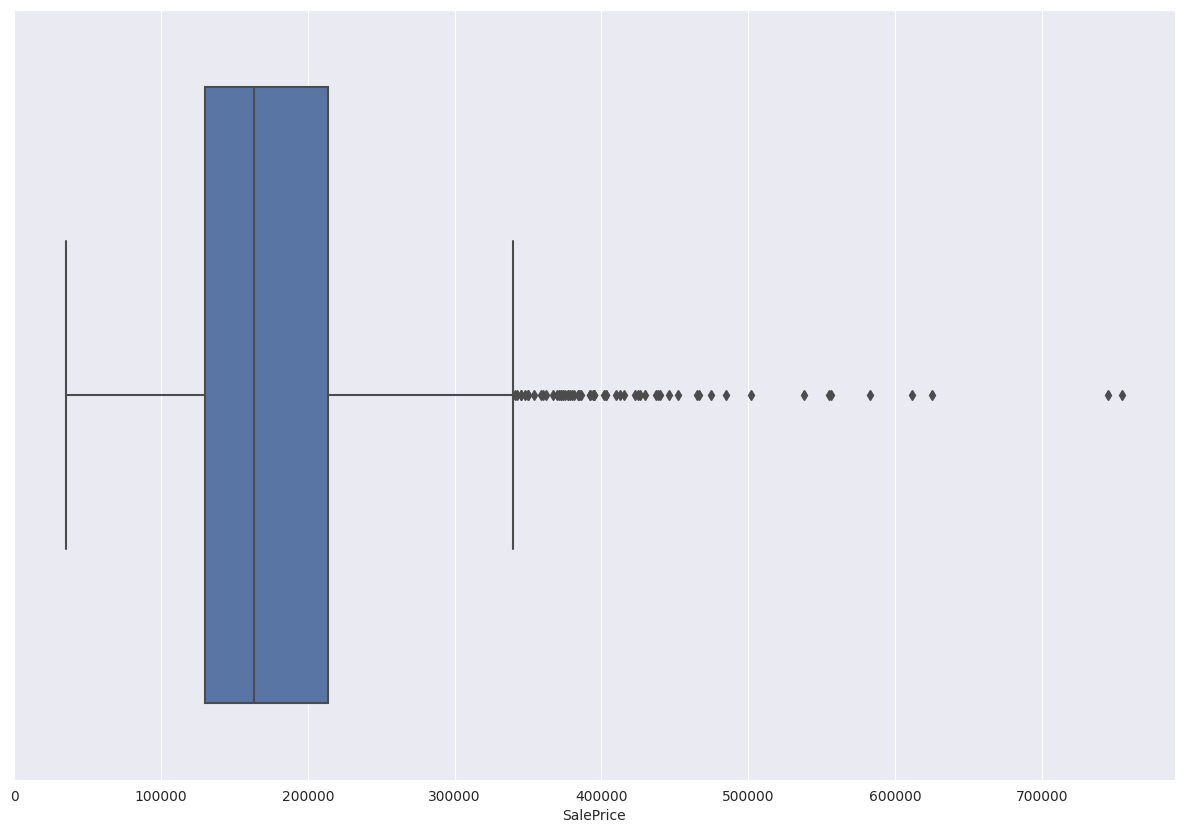

In [636]:
sns.boxplot(x=new_train['SalePrice']);

In [637]:
first_quartile = new_train['SalePrice'].quantile(.25)
third_quartile = new_train['SalePrice'].quantile(.75)
IQR = third_quartile - first_quartile

In [638]:
new_boundary = third_quartile + 3 * IQR

In [639]:
old = new_train.shape[0]
del_indexes = new_train[new_train['SalePrice'] > new_boundary].index
new_train.drop(del_indexes, axis=0, inplace=True)
new = new_train.shape[0]
print(f"so, we have just dropped {old-new} outliers. Sounds good")

so, we have just dropped 12 outliers. Sounds good


# Model

In [640]:
X = new_train.drop(['Id', 'SalePrice'], axis=1)
y = new_train['SalePrice']

In [641]:
cat_columns = list(new_train.select_dtypes(object).columns) + ['MSSubClass'] + ['OverallQual']

In [642]:
model = CatBoostRegressor(verbose=0, cat_features=cat_columns)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
params = {
    'depth': [4, 6, 8],
    'learning_rate': [0.03, 0.1, 0.3],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'n_estimators': [500, 600, 700, 800]
}

In [643]:
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=params,
    n_iter=10,
    cv=kfold,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=0
)

In [644]:
random_search.fit(X, y)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=<catboost.core.CatBoostRegressor object at 0x791d11fe9150>,
                   n_jobs=-1,
                   param_distributions={'depth': [4, 6, 8],
                                        'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        'learning_rate': [0.03, 0.1, 0.3],
                                        'n_estimators': [500, 600, 700, 800]},
                   scoring='neg_mean_squared_error')

In [645]:
random_search.best_params_

{'n_estimators': 600, 'learning_rate': 0.03, 'l2_leaf_reg': 1, 'depth': 6}

# Публикуем

In [646]:
predictions = random_search.predict(new_test.iloc[:, 1:])

In [647]:
output = pd.DataFrame({"Id": new_test['Id'], 'SalePrice': predictions})
output.to_csv("lastest_sub.csv", index=False)

In [ ]:
# top 24%